In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


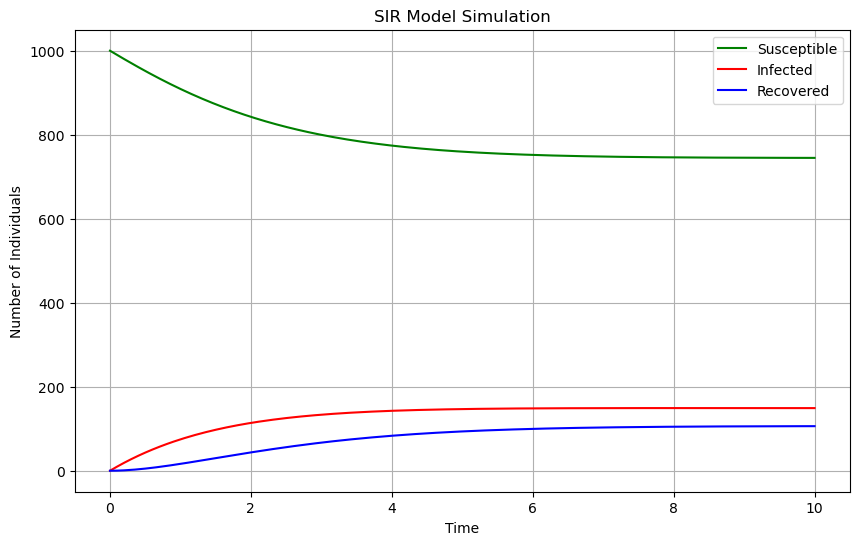

In [3]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np

# Define the differential equations
def SIR_system(t, y, a, b, c):
    S, I, R = y
    dSdt = b * R - a * S
    dIdt = a * S - c * I
    dRdt = c * I - b * R
    return [dSdt, dIdt, dRdt]

# Coefficients
a = 0.1  # Infection rate
b = 0.7  # Rate of losing immunity
c = 0.5  # Recovery rate

# Initial conditions
initial_conditions = [1000, 0, 0]  # [S0, I0, R0]

# Time span for the simulation
t_span = (0, 10)  # Simulate over 10 units of time
t_eval = np.linspace(t_span[0], t_span[1], 200)  # 200 time points for plotting

# Solve the system of differential equations
solution = solve_ivp(SIR_system, t_span, initial_conditions, args=(a, b, c), t_eval=t_eval, dense_output=True)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='Susceptible', color='g')
plt.plot(solution.t, solution.y[1], label='Infected', color='r')
plt.plot(solution.t, solution.y[2], label='Recovered', color='b')
plt.xlabel('Time')
plt.ylabel('Number of Individuals')
plt.title('SIR Model Simulation')
plt.legend()
plt.grid(True)
plt.show()


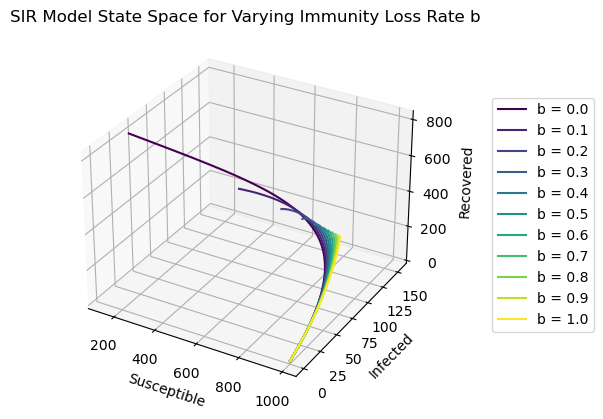

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


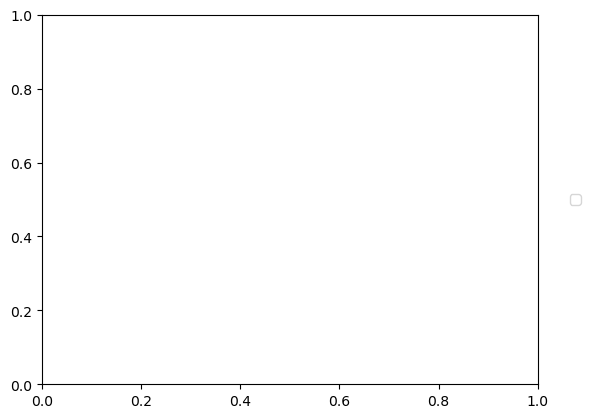

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the ODE system
def SIR_system(t, y, a, b, c):
    S, I, R = y
    dSdt = -a * S + b * R
    dIdt = a * S - c * I
    dRdt = c * I - b * R
    return [dSdt, dIdt, dRdt]

# Specify coefficients
a = 0.1  # Infection rate
c = 0.5  # Recovery rate

# Initial conditions
initial_conditions = [1000, 0, 0]  # [S0, I0, R0]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color map for different values of b
colors = plt.cm.viridis(np.linspace(0, 1, 11))

# Solve the system for different values of b and plot
for i, b in enumerate(np.linspace(0, 1, 11)):
    # Solve the system of ODEs
    sol = solve_ivp(SIR_system, [0, 20], initial_conditions, args=(a, b, c), dense_output=True)
    t_range = np.linspace(0, 20, 200)  # Time range for the solution
    S, I, R = sol.sol(t_range)
    ax.plot(S, I, R, color=colors[i], label=f'b = {b:.1f}')

# Set the labels and title
ax.set_xlabel('Susceptible')
ax.set_ylabel('Infected')
ax.set_zlabel('Recovered')
ax.set_title('SIR Model State Space for Varying Immunity Loss Rate b')
plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
plt.show()

# Set the view angle
ax.view_init(elev=30, azim=120)  # Adjust elevation and azimuthal angles as needed

plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()


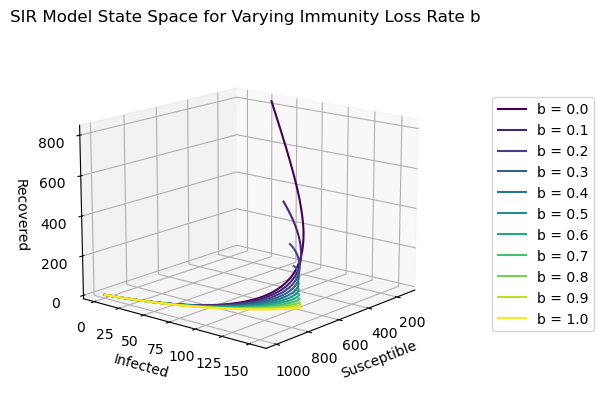

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the system of differential equations
def SIR_system(t, y, a, b, c):
    S, I, R = y
    dSdt = -a * S + b * R
    dIdt = a * S - c * I
    dRdt = c * I - b * R
    return [dSdt, dIdt, dRdt]

# Coefficients
a = 0.1  # Infection rate
c = 0.5  # Recovery rate

# Initial conditions
initial_conditions = [1000, 0, 0]  # [S0, I0, R0]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Color map for different values of b
colors = plt.cm.viridis(np.linspace(0, 1, 11))

# Solve the system for different values of b and plot
for i, b in enumerate(np.linspace(0, 1, 11)):
    # Solve the system of ODEs
    sol = solve_ivp(SIR_system, [0, 20], initial_conditions, args=(a, b, c), dense_output=True)
    t_range = np.linspace(0, 20, 200)  # Time range for the solution
    S, I, R = sol.sol(t_range)
    ax.plot(S, I, R, color=colors[i], label=f'b = {b:.1f}')

# Adjust viewing angles here
ax.view_init(elev=15, azim=40)  # Set elevation to 30 and azimuth to 120 degrees

# Set the labels and title
ax.set_xlabel('Susceptible')
ax.set_ylabel('Infected')
ax.set_zlabel('Recovered')
ax.set_title('SIR Model State Space for Varying Immunity Loss Rate b')
plt.legend(loc='center left', bbox_to_anchor=(1.15, 0.5))
plt.show()
